In [1]:
from fastai2.tabular.all import *
from fastShap import *

In [2]:
# dataset
path = untar_data(URLs.ADULT_SAMPLE)
dataframe = pd.read_csv(path/'adult.csv')
# variables
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
# preprocessing
procs = [Categorify, FillMissing, Normalize]
splits = IndexSplitter(list(range(800,1000)))(range_of(dataframe))
to = TabularPandas(dataframe, procs, cat_names, cont_names, y_names="salary", splits=splits)
# assemble data loader
dataloaders = to.dataloaders()

In [3]:
# model
learn = tabular_learner(dataloaders, layers=[200,100], metrics=accuracy)
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.379071,0.366030,0.810000,00:10


In [4]:
# interpretation
interpreter = ShapInterpretation(learn)

Classification model detected, we will display the score for the class <50k
(use `class_id` to specify another class)


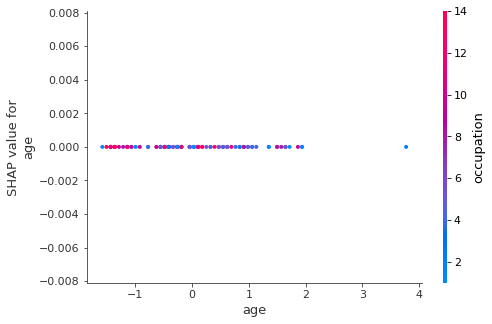

In [5]:
# This should not be flat...
interpreter.dependence_plot('age')

In [6]:
interpreter.force_plot()

Classification model detected, we will display the score for the class <50k
(use `class_id` to specify another class)


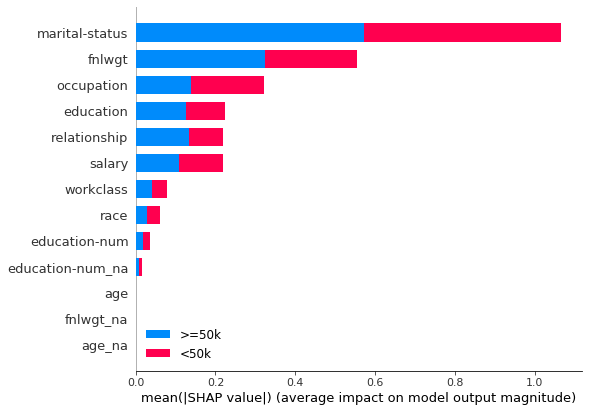

In [7]:
interpreter.summary_plot()

Classification model detected, we will display the score for the class <50k
(use `class_id` to specify another class)


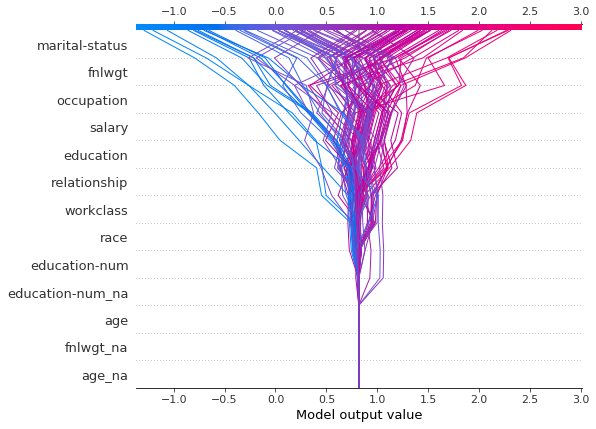

In [8]:
interpreter.decision_plot()

Classification model detected, we will display the score for the class <50k
(use `class_id` to specify another class)
Displaying row 18 of 100 (use `row_index` to specify another row)


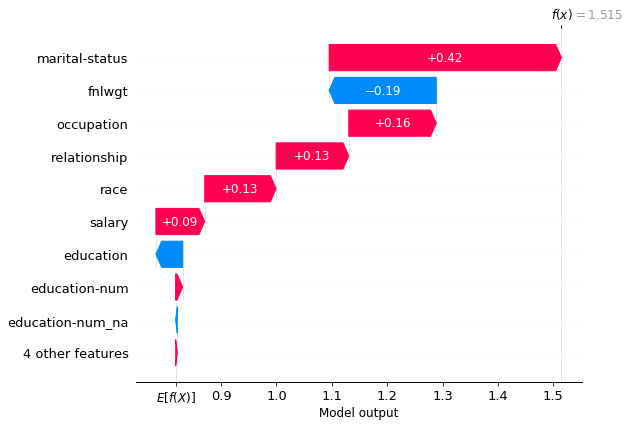

In [9]:
interpreter.waterfall_plot()